# Base Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Explore Base Dataset

1. **信用风险评分（credit_risk_score）**：
   - **理由**：信用风险评分是银行用来评估申请人信用风险的重要指标，直接反映了申请人的信用情况，这与欺诈行为有很大关联。

2. **收入（income）**：
   - **理由**：收入水平可以帮助识别申请人的经济状况，高收入可能意味着较低的欺诈风险，而异常高或异常低的收入可能提示潜在的欺诈风险。

3. **姓名邮箱相似度（name_email_similarity）**：
   - **理由**：名字和邮箱的相似度可以揭示申请人提供的信息是否一致，低相似度可能提示使用假信息进行欺诈。

4. **申请日期（days_since_request）**：
   - **理由**：申请日期可以揭示短时间内大量申请的情况，这可能是欺诈行为的一个重要指标。

5. **邮政编码4周内计数（zip_count_4w）**：
   - **理由**：同一邮政编码内短时间内大量申请可能提示某个地区的集中欺诈行为。

6. **设备欺诈计数（device_fraud_count）**：
   - **理由**：使用同一设备的欺诈申请数量是一个直接的欺诈指示器，历史上的欺诈记录是预测未来欺诈的强指标。

7. **电话有效性（phone_home_valid, phone_mobile_valid）**：
   - **理由**：电话的有效性可以帮助识别申请人的真实性，虚假或无效的电话号码可能提示欺诈行为。

8. **预期余额金额（intended_balcon_amount）**：
   - **理由**：预期余额金额的异常值可能提示欺诈行为，例如非常高的初始转账金额。

9. **住房状态（housing_status）**：
   - **理由**：住房状态反映了申请人的稳定性，较稳定的住房状态可能意味着较低的欺诈风险。


In [29]:
base = pd.read_csv('datasets/Base.csv')
base

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [48]:
base.describe(include='all')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB,NaN,...,NaN,NaN,NaN,INTERNET,NaN,other,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370554,NaN,...,NaN,NaN,NaN,992952,NaN,342728,NaN,NaN,NaN,NaN
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,NaN,1572.692049,...,0.222988,515.851010,0.025242,NaN,7.544940,NaN,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,NaN,1005.374565,...,0.416251,487.559902,0.156859,NaN,8.033106,NaN,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,NaN,1.000000,...,0.000000,190.000000,0.000000,NaN,-1.000000,NaN,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,NaN,894.000000,...,0.000000,200.000000,0.000000,NaN,3.103053,NaN,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,NaN,1263.000000,...,0.000000,200.000000,0.000000,NaN,5.114321,NaN,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,NaN,1944.000000,...,0.000000,500.000000,0.000000,NaN,8.866131,NaN,1.000000,1.000000,0.0,5.000000


## 1.1 Missing values
Missing values are represented by -1 or negative values in the dataset. Let's replace them with NaN values.

As the description says, there are only 6 numeric columns with missing values:

1. **prev_address_months_count**: -1 indicates a missing value.
2. **Current Address Months Count (numeric value) current_address_months_count**: -1 indicates a missing value.
3. **Expected Balance Amount (numeric value) introduced_balcon_amount**: a negative value indicates a missing value.
4. **Session length (numeric value) session_length_in_minutes**: -1 indicates a missing value.
5. **Bank account months (numeric value) bank_months_count**: -1 indicates a missing value.
6. **device_unique_emails_count (numeric value) device_distinct_emails**: -1 indicates a missing value.


In [41]:
# check for missing values（-1 or negative values）
# select the columns with missing values
missing_cols = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'session_length_in_minutes', 'bank_months_count', 'device_distinct_emails_8w']

df=base.copy()

# replace -1 or negative values with NaN
df[missing_cols] = df[missing_cols].replace(-1, np.nan)
df[missing_cols] = df[missing_cols].applymap(lambda x: np.nan if x < 0 else x)

C:\Users\yhb\AppData\Local\Temp\ipykernel_31384\4223041878.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[missing_cols] = df[missing_cols].applymap(lambda x: np.nan if x < 0 else x)


In [42]:
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount              742523
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

## 1.2 Deal with Missing Values
- As the missing values in col[prev_address_months_count] and col[intended_balcon_amount] are too many, we can drop the 2 cols.
- For the [bank_months_count], about 25% of the values are missing, we can fill the missing values.
    - 选择使用该列最多的情况（1）进行填充，这样处理可以保持数据的一致性，并避免引入过多的偏差。
- For the rest of the cols(3 cols), the missing values are less than 1%, we can drop the rows with missing values.

In [43]:
# drop the columns with too many missing values
df.drop(columns=['prev_address_months_count', 'intended_balcon_amount'], inplace=True)

# fill the missing values in bank_months_count with the median value
df['bank_months_count'].fillna(1, inplace=True)

# drop the rows with missing values
df.dropna(inplace=True)


E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


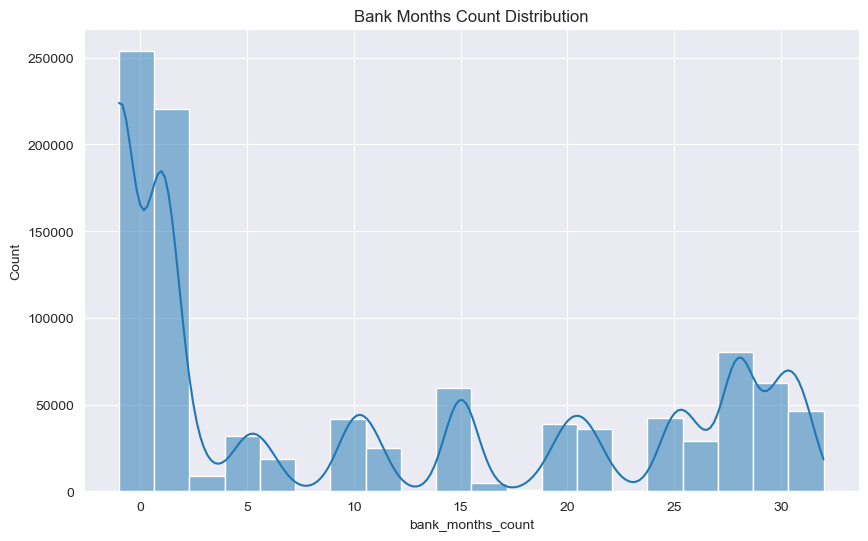

In [38]:
# draw the plot for bank_months_count before filling the missing values
plt.figure(figsize=(10, 6))
sns.histplot(base['bank_months_count'], bins=20, kde=True)
plt.title('Bank Months Count Distribution')
plt.show()

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


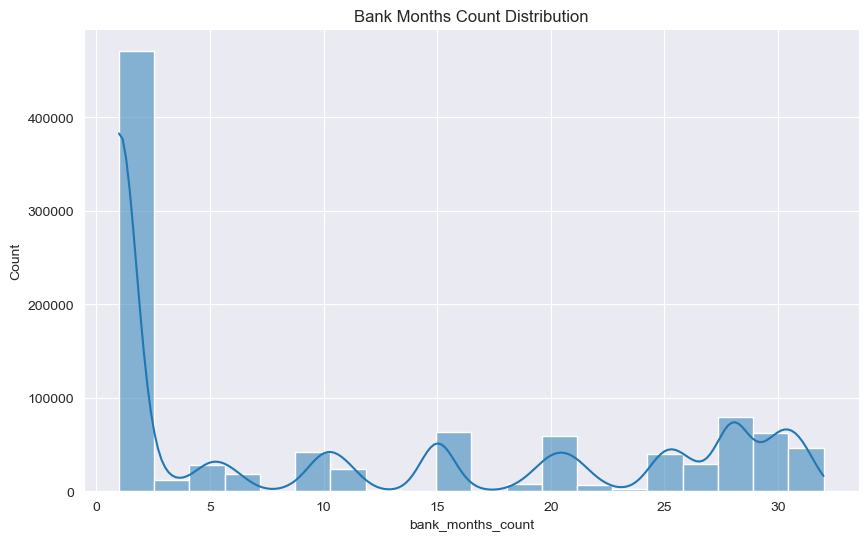

In [39]:
# draw the plot for bank_months_count after filling the missing values
plt.figure(figsize=(10, 6))
sns.histplot(df['bank_months_count'], bins=20, kde=True)
plt.title('Bank Months Count Distribution')
plt.show()

In [44]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os                           0
keep_alive_s

## 1.3 Numeric Features Analysis
一共三种特征：数值型，二进制，类别型

类别型有5个变量：付款类型（分类）payment_type，就业状态（分类）employment_status，住房状态（分类）housing_status，来源（分类）source，设备操作系统（分类）device_os

二进制7个：binary_features = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'fraud_bool'
]

数值型18个（有两个被删了）

In [55]:
# 筛选出二进制特征
binary_features_name = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'fraud_bool'
]

binary_features = df[binary_features_name]

In [59]:
# 列出所有的数值型特征
numeric_features_name = df.select_dtypes(include=['number']).columns.tolist()
# 去掉二进制特征
numeric_features_name = [col for col in numeric_features_name if col not in binary_features_name]

numeric_features = df[numeric_features_name]

In [61]:
# 筛选出类别型特征
cate_features_name = df.select_dtypes(include=['object']).columns.tolist()
cate_features = df[cate_features_name]